# Project Sains Data

## [Tugas 1] Crawling Data Twitter

In [ ]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 KB 3.3 MB/s eta 0:00:00


In [ ]:
import requests as req
from bs4 import BeautifulSoup as bs
import csv
from csv import writer # untuk file csv
import pandas as pd
from tqdm.notebook import tqdm
from ipywidgets import FloatProgress
import snscrape.modules.twitter as sntwitter
#agent user : supaya web server menampilkan konten yang dimiliki sesuai dengan OS yang kita gunakan, jadi web server tau browser dan OS yang kita gunakan
hades = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36'}

In [ ]:
scraper=sntwitter.TwitterSearchScraper("#prabowo")
tweets=[]
n_tweets=10
for i, tweet in tqdm(enumerate(scraper.get_items()), total=n_tweets):
    data=[
        tweet.user.username, 
        tweet.rawContent, 
        tweet.user.location,
    ]
    tweets.append(data)
    if i > n_tweets:
        break
tweet_df=pd.DataFrame(tweets, columns=['@Username','Tweet', 'Lokasi'])
tweet_df

  0%|          | 0/10 [00:00<?, ?it/s]

,@Username,Tweet,Lokasi
0,NandaySalsabila,PRABOWO Presiden.. GERINDRA Menang..!!\nBerger...,
1,JatengTV,(13) Masih belum banyak peraturan yang mengatu...,"Semarang, Jawa Tengah"
2,Alie_Fahnoor,Kebanyakan alat-alat yang kita gunakan berasal...,𝙅𝙖𝙠𝙖𝙧𝙩𝙖
3,ainunwulandar13,@prabowo 17.56 | Bantuan ini merupakan tahap k...,
4,gerindra_pati,Tidak ada dendam dan benci dalam kamus politik...,"Pati, Indonesia"
5,RickyTamba_,"JOKOWI, PRABOWO, MILENIAL DAN UMKM\n\nVideo le...",Indonesia (Id)
6,Alie_Fahnoor,Karya anak negeri. Patut dibanggakan\n\nMaju t...,𝙅𝙖𝙠𝙖𝙧𝙩𝙖
7,RickyTamba_,"JOKOWI, PRABOWO, MILENIAL DAN UMKM\n\nVideo le...",Indonesia (Id)
8,RickyTamba_,"JOKOWI, PRABOWO, MILENIAL DAN UMKM\n\nVideo le...",Indonesia (Id)
9,Alie_Fahnoor,"Betul itu, Pak Sandy.\n\nKesan pertama melihat...",𝙅𝙖𝙠𝙖𝙧𝙩𝙖


In [ ]:
tweet_df.to_csv('Twitter-prabowo.csv', index=False)

## [Tugas 2] Crawling Data Berita

In [ ]:
url = "https://nasional.tempo.co/" # instalisasi alamat url
berita =[]
res = req.get(url) # menggunakan url untuk mengirim header
html = bs(res.content, "html.parser")    # parsing html menggunakan Beautifulsoup
rows = html.find("div", class_ = "overflow margin-bottom-xs")     # menggunakan fungsi find untuk mencari class dengan nama "_1E0nAqju"
divs = rows.findAll("div", {"class" :"card-box ft240 margin-bottom-sm"})   # mencari semua class dengan nama "I8luE9wS" yang ada pada variabel rows
for div in divs:
    title = div.find("article", class_ = "text-card").h2.get_text().replace('\n', '')    # mencari tag  dan mereplace baris kosong atau enter
    isi = div.find("article", class_ = "text-card").p.get_text().replace('\t', '')     # mencari  dan mereplace spaci
    berita.append([title,isi])     # membuat kolom baris data pada csv dengan variabel (kategori, title)
news = pd.DataFrame(berita,columns=['Judul','Isi']) 
news

,Judul,Isi
0,Putusan Sidang Etik Richard Eliezer Diharapkan...,Azmi Syahputra mengatakan kendati putusan sida...
1,Kejaksaan Agung Panggil 5 Saksi di Kasus Korup...,Kejaksaan Agung memeriksa lima saksi dalam kas...
2,Kuasa Hukum Sebut Keluarga Bersyukur Richard ...,Ronny Talapessy menyebut putusan sidang kode e...
3,"Elektabilitas Anies Baswedan Anjlok, Sudirman ...",Turunnya elektabilitas Anies Baswedan dalam su...
4,Anies Baswedan Tegaskan Pilih Sistem Proposion...,Anies Baswedan menilai sistem proporsional ter...
5,Anies Baswedan Pastikan Hadiri Rakernas PKS Besok,Sudirman Said mengatakan besok Anies Baswedan ...
6,MIND ID Dorong Integrasi Bisnis Baterai Kendar...,Salah satu kunci sukses membangun Ekosistem EV...
7,"Richard Eliezer Tetap Menjadi Polisi, Keluarg...",Keluarga Brigadir Yosua berharap Richard Eliez...
8,Setara Institute Desak Pemerintah Cabut Aturan...,Setara Institute meyakini penghapusan syarat ...
9,KKP Tetapkan Hiu Berjalan Dilindungi Penuh,Ketetapan ini tertuang dalam Kepmen KP Nomor 3...


In [ ]:
news.to_csv('berita_tempo.csv', index=False)

## [ Tugas 3] Crawling Data PTA Trunojoyo

In [ ]:
#create an object HTTPresponse
def DataPTA(page):
  global hades
  data=[]
  for p in range(1,page+1):
    if p==1 :
      URL = "https://pta.trunojoyo.ac.id/c_search/byprod/10/"
    else :
      URL = f"https://pta.trunojoyo.ac.id/c_search/byprod/10/{p}"
    request = req.get(URL,hades).text
    #var bs yang menyimpan data request berupa html
    soup = bs(request, 'lxml')
    prodi = soup.find_all('div',{'id':'begin'})
    for pro in prodi:
      prod = pro.find('h2').text
    jur = prod[-18:]
    ul = soup.find('ul', 'items list_style')
    li = ul.find_all('li', {'data-id':'id-1'})
    for x in li:
      link = x.find('a','gray button')['href']
      request2 = req.get(link, hades).text
      soup2 = bs(request2, 'lxml')
      abst= soup2.find('p',{'align':'justify'}).text.replace('\r','').replace('\n','')
      NPM = x.find('a','gray button')['href'][-12:]
      headline = x.find('a', 'title').text.replace('\r','').replace('\n','')
      data.append([NPM,headline,abst,jur])
  return data

In [ ]:
data=DataPTA(172)
result = pd.DataFrame(data)
result.columns = ["NPM", "Judul","Abstrak","Prodi"]
result

,NPM,Judul,Abstrak,Prodi
0,040411100468,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE T...,Sistem informasi akademik (SIAKAD) merupaka...,Teknik Informatika
1,040411100476,APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,Berjalannya koneksi jaringan komputer dengan l...,Teknik Informatika
2,040411100480,RANCANG BANGUN APLIKASI PROXY SERVER UNTUKENKR...,Web server adalah sebuah perangkat lunak serve...,Teknik Informatika
3,070411100070,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,Penjadwalan kuliah di Perguruan Tinggi me...,Teknik Informatika
4,080411100115,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,Seiring perkembangan teknologi yang ada diduni...,Teknik Informatika
...,...,...,...,...
853,160411100032,PENERAPAN ALGORITMA LONG-SHORT TERM MEMORY UNT...,Investasi saham selama ini memiliki resiko ker...,Teknik Informatika
854,160411100182,SISTEM PENCARIAN TEKS AL-QURAN TERJEMAHAN BERB...,Information Retrieval (IR) merupakan pengambil...,Teknik Informatika
855,160411100077,KLASIFIKASI KOMPLEKSITAS VISUAL CITRA SAMPAH M...,Klasifikasi citra merupakan proses pengelompok...,Teknik Informatika
856,160411100084,IDENTIFIKASI BINER ATRIBUT PEJALAN KAKI MENGGU...,Identifikasi atribut pejalan kaki merupakan sa...,Teknik Informatika


In [ ]:
# result.to_csv('pta_infor.csv', index=False)
result.to_excel('pta_infor.xlsx', index=False)

## [Tugas 4]

http://localhost:8888/?token=456ad165f4ea36ec8cba4ebfcb67914e74cb23f142b572a4

In [ ]:
!pip install mysqlclient
!pip install mysql-connector-python
!pip install pymysql
!pip install pyodbc
!pip install psycopg2
!pip install pandas

In [ ]:
import pyodbc 
import pandas as pd
cnxn_str = ("Driver={odbc driver 17 for sql server};"
            "Server=DESKTOP-82B6F9B\SQLEXPRESS;"
            "Database=prosain200411100174;"
            "Trusted_Connection=yes;")
cnxn = pyodbc.connect(cnxn_str)
cursor = cnxn.cursor()	
cursor.execute("SELECT * FROM dbo.petalwidthh") 
row = cursor.fetchall() 
cursor.close()
data=[]
for i in row:
    data.append([i[0],i[1],i[2]])
df_sqlServer = pd.DataFrame(data, columns=['id','petalwidth','class'])
df_sqlServer


,id,petalwidth,class
0,1,0.2,Iris-setosa
1,2,0.2,Iris-setosa
2,3,0.2,Iris-setosa
3,4,0.2,Iris-setosa
4,5,0.2,Iris-setosa
...,...,...,...
145,146,2.3,Iris-virginica
146,147,1.9,Iris-virginica
147,148,2,Iris-virginica
148,149,2.3,Iris-virginica


In [ ]:
import psycopg2
import pandas as pd
# Connection parameters, yours will be different
param_dic = {
    "host"      : "tiny.db.elephantsql.com",
    "database"  : "xhnmpbtl",
    "user"      : "xhnmpbtl",
    "password"  : "oWmT-kw1-VNpopQTdwgceQglfn0Nln6n"
}
def connect(params_dic):
    """ Connect to the PostgreSQL database server """
    conn = None
    try:
        # connect to the PostgreSQL server
        print('Connecting to the PostgreSQL database...')
        conn = psycopg2.connect(**params_dic)
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        sys.exit(1) 
    print("Connection successful")
    return conn

def postgresql_to_dataframe(conn, select_query, column_names):
    """
    Tranform a SELECT query into a pandas dataframe
    """
    cursor = conn.cursor()
    try:
        cursor.execute(select_query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    
    # Naturally we get a list of tupples
    tupples = cursor.fetchall()
    cursor.close()
    
    # We just need to turn it into a pandas dataframe
    df = pd.DataFrame(tupples, columns=column_names)
    return df

# Connect to the database
conn = connect(param_dic)

column_names = ['id','sepalwidth']

df_postEle = postgresql_to_dataframe(conn, "select * from sepalwidthh", column_names)
df_postEle

Connecting to the PostgreSQL database...
Connection successful


,id,sepalwidth
0,1,3.5
1,2,3
2,3,3.2
3,4,3.1
4,5,3.6
...,...,...
145,146,3
146,147,2.5
147,148,3
148,149,3.4


In [ ]:
import psycopg2
import pandas as pd
# Connection parameters, yours will be different
param_dic = {
    "host"      : "localhost",
    "database"  : "prosain200411100174",
    "user"      : "postgres",
    "password"  : "nurulfaizah23"
}
def connect(params_dic):
    """ Connect to the PostgreSQL database server """
    conn = None
    try:
        # connect to the PostgreSQL server
        print('Connecting to the PostgreSQL database...')
        conn = psycopg2.connect(**params_dic)
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        sys.exit(1) 
    print("Connection successful")
    return conn

def postgresql_to_dataframe(conn, select_query, column_names):
    """
    Tranform a SELECT query into a pandas dataframe
    """
    cursor = conn.cursor()
    try:
        cursor.execute(select_query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    
    # Naturally we get a list of tupples
    tupples = cursor.fetchall()
    cursor.close()
    
    # We just need to turn it into a pandas dataframe
    df = pd.DataFrame(tupples, columns=column_names)
    return df

# Connect to the database
conn = connect(param_dic)

column_names = ['id','sepallength']

df_postLocal = postgresql_to_dataframe(conn, "select * from sepallengthh", column_names)
df_postLocal

Connecting to the PostgreSQL database...
Connection successful


,id,sepallength
0,1,5.1
1,2,4.9
2,3,4.7
3,4,4.6
4,5,5
...,...,...
145,146,6.7
146,147,6.3
147,148,6.5
148,149,6.2


In [ ]:
!pip install mysqlclient
!pip install mysql-connector-python
!pip install pymysql

In [ ]:
import mysql.connector
import pandas as pd

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="",
  database="prosain200411100174"
)

mycursor = mydb.cursor()

mycursor.execute("SELECT * FROM petallengthh")

myresult = mycursor.fetchall()
mycursor.close()
df_mysql = pd.DataFrame(myresult, columns=['id','petallength'])
# df_mysql.drop(df_mysql.columns[[0]],axis=1,inplace=True)
df_mysql

,id,petallength
0,1,1.4
1,2,1.4
2,3,1.3
3,4,1.5
4,5,1.4
...,...,...
145,146,5.2
146,147,5
147,148,5.2
148,149,5.4


In [ ]:
# merge df
result = pd.concat([df_postLocal, df_postEle,df_mysql, df_sqlServer], axis=1)
#result = pd.merge(df_postLocal,df_sqlServer, how="inner", on=["id", "id"])
result

,id,sepallength,id,sepalwidth,id,petallength,id,petalwidth,class
0,1,5.1,1,3.5,1,1.4,1,0.2,Iris-setosa
1,2,4.9,2,3,2,1.4,2,0.2,Iris-setosa
2,3,4.7,3,3.2,3,1.3,3,0.2,Iris-setosa
3,4,4.6,4,3.1,4,1.5,4,0.2,Iris-setosa
4,5,5,5,3.6,5,1.4,5,0.2,Iris-setosa
...,...,...,...,...,...,...,...,...,...
145,146,6.7,146,3,146,5.2,146,2.3,Iris-virginica
146,147,6.3,147,2.5,147,5,147,1.9,Iris-virginica
147,148,6.5,148,3,148,5.2,148,2,Iris-virginica
148,149,6.2,149,3.4,149,5.4,149,2.3,Iris-virginica


In [ ]:
result.drop(result.columns[[0,2,4,6]],axis=1,inplace=True)
result

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3,5.2,2.3,Iris-virginica
146,6.3,2.5,5,1.9,Iris-virginica
147,6.5,3,5.2,2,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
X = result.values[:, :4]
Y = result.values[:, 4]
print(X)

[['5.1' '3.5' '1.4' '0.2']
 ['4.9' '3' '1.4' '0.2']
 ['4.7' '3.2' '1.3' '0.2']
 ['4.6' '3.1' '1.5' '0.2']
 ['5' '3.6' '1.4' '0.2']
 ['5.4' '3.9' '1.7' '0.4']
 ['4.6' '3.4' '1.4' '0.3']
 ['5' '3.4' '1.5' '0.2']
 ['4.4' '2.9' '1.4' '0.2']
 ['4.9' '3.1' '1.5' '0.1']
 ['5.4' '3.7' '1.5' '0.2']
 ['4.8' '3.4' '1.6' '0.2']
 ['4.8' '3' '1.4' '0.1']
 ['4.3' '3' '1.1' '0.1']
 ['5.8' '4' '1.2' '0.2']
 ['5.7' '4.4' '1.5' '0.4']
 ['5.4' '3.9' '1.3' '0.4']
 ['5.1' '3.5' '1.4' '0.3']
 ['5.7' '3.8' '1.7' '0.3']
 ['5.1' '3.8' '1.5' '0.3']
 ['5.4' '3.4' '1.7' '0.2']
 ['5.1' '3.7' '1.5' '0.4']
 ['4.6' '3.6' '1' '0.2']
 ['5.1' '3.3' '1.7' '0.5']
 ['4.8' '3.4' '1.9' '0.2']
 ['5' '3' '1.6' '0.2']
 ['5' '3.4' '1.6' '0.4']
 ['5.2' '3.5' '1.5' '0.2']
 ['5.2' '3.4' '1.4' '0.2']
 ['4.7' '3.2' '1.6' '0.2']
 ['4.8' '3.1' '1.6' '0.2']
 ['5.4' '3.4' '1.5' '0.4']
 ['5.2' '4.1' '1.5' '0.1']
 ['5.5' '4.2' '1.4' '0.2']
 ['4.9' '3.1' '1.5' '0.1']
 ['5' '3.2' '1.2' '0.2']
 ['5.5' '3.5' '1.3' '0.2']
 ['4.9' '3.1' '1.5' '0.

In [ ]:
!pip install scikit-learn

  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( 
    X, Y, test_size = 0.2, random_state = 100)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print (" DecisionTree Accuracy : ",
    accuracy_score(y_test,y_pred)*100)

 DecisionTree Accuracy :  96.66666666666667


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print (" KNN Accuracy : ",
    accuracy_score(y_test,y_pred)*100)

 KNN Accuracy :  100.0


Penjelasan 
pertama memisahkan 4 data sesuai ketentuan setelah itu dari 4 database yang berbeda kemudian dijadikan satu menggunakan perintah pd.concat kemudian menghapus kolom-kolom id yang tidak digunakan setelah semua kolom telah di prepocessing kemudian dimasukkan membagi data dengan data test dan data training setelah itu masukkan model DecisionTreeClassifier dan menghitung akurasinya untuk model yang kedua yaitu KNeighborsClassifier dan menghitung akurasinya

## [Tugas 5]

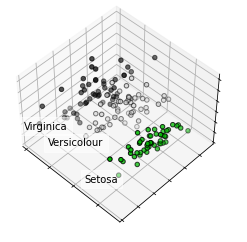

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn import decomposition
from sklearn import datasets

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

In [ ]:
# Load the dataset
from sklearn import datasets
from sklearn.model_selection import train_test_split
 
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=100)
X_train[0:4,:]

array([[5.5, 2.4, 3.7, 1. ],
       [5.7, 2.8, 4.1, 1.3],
       [6. , 2.2, 5. , 1.5],
       [4.8, 3. , 1.4, 0.1]])

In [ ]:
from sklearn import linear_model
from scipy.special import expit
 
model = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
model.fit(X_train, y_train)
model.score(X_test,y_test)

1.0

In [ ]:
# magic code
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
pca.fit(iris.data)
 
# Transofm the iris data to just 2 dimensions
iris_red = pca.transform(iris.data)
X_train, X_test, y_train, y_test = train_test_split(iris_red, iris.target, test_size=0.2, random_state=100)
X_train[0:4,:]

array([[-0.18962247, -0.68028676],
       [ 0.29900084, -0.34889781],
       [ 1.30079171, -0.76114964],
       [-2.78610927, -0.235112  ]])

In [ ]:
# Now, let's fit the model with just these 2 variables.
model_red = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
model.fit(X_train, y_train)
model.score(X_test,y_test)

1.0

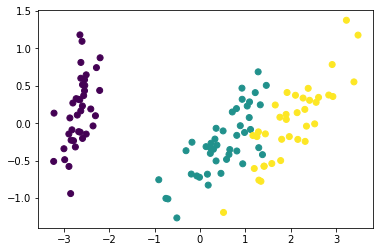

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
 
plt.scatter(X_train[:,0],X_train[:,1],c = y_train)


## [Tugas 6] Data Time Saries

### Get and prepare Data

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df_data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
df_data.head(7)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148


In [ ]:
df_data.shape

(144, 2)

In [ ]:
df_passenger= df_data['Passengers']

In [ ]:
# transform univariate time series to supervised learning problem
from numpy import array
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + n_steps
    # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
    # gather input and output parts of the pattern
        # print(i, end_ix)
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

### tuning data

In [ ]:
n_steps = 2
X, y = split_sequence(df_passenger, n_steps)

In [ ]:
print(X.shape, y.shape)

(142, 2) (142,)


In [ ]:
# column names to X and y data frames
df_X = pd.DataFrame(X, columns=['t-'+str(i) for i in range(n_steps-1, -1,-1)])
df_y = pd.DataFrame(y, columns=['t+1 (prediction)'])

# concat df_X and df_y
df = pd.concat([df_X, df_y], axis=1)

In [ ]:
# df_X.head()
# df_y.head()
df.head(3)

,t-1,t-0,t+1 (prediction)
0,112,118,132
1,118,132,129
2,132,129,121


### prepo

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_norm= scaler.fit_transform(df_X)
# y_norm= scaler.fit_transform(df_y)

In [ ]:
X_norm

array([[0.01544402, 0.02702703],
       [0.02702703, 0.05405405],
       [0.05405405, 0.04826255],
       [0.04826255, 0.03281853],
       [0.03281853, 0.05984556],
       [0.05984556, 0.08494208],
       [0.08494208, 0.08494208],
       [0.08494208, 0.06177606],
       [0.06177606, 0.02895753],
       [0.02895753, 0.        ],
       [0.        , 0.02702703],
       [0.02702703, 0.02123552],
       [0.02123552, 0.04247104],
       [0.04247104, 0.07142857],
       [0.07142857, 0.05984556],
       [0.05984556, 0.04054054],
       [0.04054054, 0.08687259],
       [0.08687259, 0.12741313],
       [0.12741313, 0.12741313],
       [0.12741313, 0.1042471 ],
       [0.1042471 , 0.05598456],
       [0.05598456, 0.01930502],
       [0.01930502, 0.06949807],
       [0.06949807, 0.07915058],
       [0.07915058, 0.08880309],
       [0.08880309, 0.14285714],
       [0.14285714, 0.11389961],
       [0.11389961, 0.13127413],
       [0.13127413, 0.14285714],
       [0.14285714, 0.18339768],
       [0.

### Split data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=0)

### model

In [ ]:
# import knn
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=3)

### fit and predict knn

In [ ]:
model_knn.fit(X_train, y_train)
y_pred=model_knn.predict(X_test)

### mse

$$ \text{MSE} = \frac{1}{n} \sum_{i=0}^n (y_i - \hat{y}_i)^2$$ 

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

2207.5363984674336

### result

In [ ]:
y_test.shape

(29,)

In [ ]:
y_pred.shape

(29,)

In [ ]:
df_y_test = pd.DataFrame(y_test,columns=['y_test'])
df_y_pred = pd.DataFrame(y_pred,columns=['y_pred'])

df_hasil = pd.concat([df_y_test, df_y_pred], axis=1)

In [ ]:
df_hasil

,y_test,y_pred
0,194,163.666667
1,203,252.000000
2,170,143.666667
3,180,221.000000
4,145,137.333333
5,119,125.000000
6,318,375.333333
7,390,448.666667
8,318,343.666667
9,465,434.666667


In [ ]:
# df_hasil.to_excel('df_hasil n_step={}.xlsx'.format(n_steps), index=False)

In [ ]:
y.min()

104

In [ ]:
y.max()

622

## [Tugas 7]CBOW

### Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/prosaindata/

/content/drive/My Drive/prosaindata


In [ ]:
#install library
!pip install sastrawi
!pip install swifter
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 7.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 KB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.3 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16321 sha256=49980b67abe7a17cf668089adfcdc88935ad08bcbf5e723ecfe67381254f5f0c
  Stored in directory: /root/.cache/pip/wheels/2b/5e/f2/3931524f702ffd03309e96d35ee2fbf9c61c27377511ee8d4c
Successfully built swifter
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import library
import pandas as pd
import numpy as np
from string import punctuation
import re
import nltk

In [ ]:
#load data
df = pd.read_excel("tugas/dataset/Crawling_Data_PTA.xlsx")
df.head()

,NPM,Judul,Abstrak,Prodi,Label
0,40411100468,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE T...,Sistem informasi akademik (SIAKAD) merupaka...,Teknik Informatika,RPL
1,40411100476,APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,Berjalannya koneksi jaringan komputer dengan l...,Teknik Informatika,RPL
2,40411100480,RANCANG BANGUN APLIKASI PROXY SERVER UNTUKENKR...,Web server adalah sebuah perangkat lunak serve...,Teknik Informatika,RPL
3,70411100070,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,Penjadwalan kuliah di Perguruan Tinggi me...,Teknik Informatika,komputasi
4,80411100115,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,Seiring perkembangan teknologi yang ada diduni...,Teknik Informatika,komputasi


In [ ]:
df.shape

(853, 5)

In [ ]:
df.isnull().sum()

NPM         0
Judul       6
Abstrak    25
Prodi       0
Label      43
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(810, 5)

In [ ]:
df.isnull().sum()

NPM        0
Judul      0
Abstrak    0
Prodi      0
Label      0
dtype: int64

In [ ]:
df['Label'].value_counts()

komputasi    573
RPL          198
PBA           39
Name: Label, dtype: int64

### Preprocessing

#### 1. Symbol & Punctuation Removal, case folding

In [ ]:
#proses menghilangkan simbol dan emoji
def remove_text_special (text):
  text = text.replace('\\t',"").replace('\\n',"").replace('\\u',"").replace('\\',"")
  text = text.encode('ascii', 'replace').decode('ascii')
  return text.replace("http://"," ").replace("https://", " ")
df['Abstrak'] = df['Abstrak'].apply(remove_text_special)
print(df['Abstrak'])

0      Sistem  informasi  akademik  (SIAKAD) merupaka...
1      Berjalannya koneksi jaringan komputer dengan l...
2      Web server adalah sebuah perangkat lunak serve...
3      Penjadwalan  kuliah  di  Perguruan  Tinggi  me...
4      Seiring perkembangan teknologi yang ada diduni...
                             ...                        
848    Investasi saham selama ini memiliki resiko ker...
849    Information Retrieval (IR) merupakan pengambil...
850    Klasifikasi citra merupakan proses pengelompok...
851    Identifikasi atribut pejalan kaki merupakan sa...
852    Topik deteksi objek telah menarik perhatian ya...
Name: Abstrak, Length: 810, dtype: object


In [ ]:
def remove_tanda_baca(text):
  text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text)
  return text

df['Abstrak'] = df['Abstrak'].apply(remove_tanda_baca)
df['Abstrak'].head(20)

0     Sistem  informasi  akademik   SIAKAD  merupaka...
1     Berjalannya koneksi jaringan komputer dengan l...
2     Web server adalah sebuah perangkat lunak serve...
3     Penjadwalan  kuliah  di  Perguruan  Tinggi  me...
4     Seiring perkembangan teknologi yang ada diduni...
5     Gerak pekerja ada pada game yang memiliki genr...
6     Perkembangan game yang semakin pesat  memberik...
7     Sistem pengenalan wajah adalah suatu sistem un...
8     Teknologi mobile game beroperating system open...
9     Kantor Badan Kepegawaian kota Bangkalan adalah...
10    Penyusunan Sistem Informasi Dinas Perindustria...
11    Perusahaan pemerintah maupun swasta mempunyai ...
12    Pelayanan makanan bagi pasien rawat inap di Ru...
13    Penyusunan Sistem Pendukung Keputusan pemiliha...
14    Sidik jari adalah salah satu karakteristik fis...
15    Di Indonesia masalah perkembangan gizi adalah ...
16    Pengenalan tulisan tangan merupakan topik pene...
17    Citra senyum merupakan salah satu fitur bi

In [ ]:
#proses menghilangkan angka
def remove_numbers (text):
  return re.sub(r"\d+", "", text)
df['Abstrak'] = df['Abstrak'].apply(remove_numbers)
df['Abstrak']

0      Sistem  informasi  akademik   SIAKAD  merupaka...
1      Berjalannya koneksi jaringan komputer dengan l...
2      Web server adalah sebuah perangkat lunak serve...
3      Penjadwalan  kuliah  di  Perguruan  Tinggi  me...
4      Seiring perkembangan teknologi yang ada diduni...
                             ...                        
848    Investasi saham selama ini memiliki resiko ker...
849    Information Retrieval  IR  merupakan pengambil...
850    Klasifikasi citra merupakan proses pengelompok...
851    Identifikasi atribut pejalan kaki merupakan sa...
852    Topik deteksi objek telah menarik perhatian ya...
Name: Abstrak, Length: 810, dtype: object

In [ ]:
#proses casefolding
def casefolding(Comment):
  Comment = Comment.lower()
  return Comment
df['Abstrak'] = df['Abstrak'].apply(casefolding)
df['Abstrak']

0      sistem  informasi  akademik   siakad  merupaka...
1      berjalannya koneksi jaringan komputer dengan l...
2      web server adalah sebuah perangkat lunak serve...
3      penjadwalan  kuliah  di  perguruan  tinggi  me...
4      seiring perkembangan teknologi yang ada diduni...
                             ...                        
848    investasi saham selama ini memiliki resiko ker...
849    information retrieval  ir  merupakan pengambil...
850    klasifikasi citra merupakan proses pengelompok...
851    identifikasi atribut pejalan kaki merupakan sa...
852    topik deteksi objek telah menarik perhatian ya...
Name: Abstrak, Length: 810, dtype: object

#### 2. Word Normalization

In [ ]:
#proses tokenisasi
# from nltk.tokenize import TweetTokenizer
nltk.download('punkt')
# def word_tokenize(text):
#   tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
#   return tokenizer.tokenize(text)

df['review_token'] = df['Abstrak'].apply(lambda sentence: nltk.word_tokenize(sentence))
df['review_token']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0      [sistem, informasi, akademik, siakad, merupaka...
1      [berjalannya, koneksi, jaringan, komputer, den...
2      [web, server, adalah, sebuah, perangkat, lunak...
3      [penjadwalan, kuliah, di, perguruan, tinggi, m...
4      [seiring, perkembangan, teknologi, yang, ada, ...
                             ...                        
848    [investasi, saham, selama, ini, memiliki, resi...
849    [information, retrieval, ir, merupakan, pengam...
850    [klasifikasi, citra, merupakan, proses, pengel...
851    [identifikasi, atribut, pejalan, kaki, merupak...
852    [topik, deteksi, objek, telah, menarik, perhat...
Name: review_token, Length: 810, dtype: object

In [ ]:
#Normalisasi kata tidak baku
normalize = pd.read_excel("tugas/dataset/Normalization Data.xlsx")

normalize_word_dict = {}

for row in normalize.iterrows():
  if row[0] not in normalize_word_dict:
    normalize_word_dict[row[0]] = row[1]

def normalized_term(comment):
  return [normalize_word_dict[term] if term in normalize_word_dict else term for term in comment]

df['comment_normalize'] = df['review_token'].apply(normalized_term)
df['comment_normalize'].head(20)

0     [sistem, informasi, akademik, siakad, merupaka...
1     [berjalannya, koneksi, jaringan, komputer, den...
2     [web, server, adalah, sebuah, perangkat, lunak...
3     [penjadwalan, kuliah, di, perguruan, tinggi, m...
4     [seiring, perkembangan, teknologi, yang, ada, ...
5     [gerak, pekerja, ada, pada, game, yang, memili...
6     [perkembangan, game, yang, semakin, pesat, mem...
7     [sistem, pengenalan, wajah, adalah, suatu, sis...
8     [teknologi, mobile, game, beroperating, system...
9     [kantor, badan, kepegawaian, kota, bangkalan, ...
10    [penyusunan, sistem, informasi, dinas, perindu...
11    [perusahaan, pemerintah, maupun, swasta, mempu...
12    [pelayanan, makanan, bagi, pasien, rawat, inap...
13    [penyusunan, sistem, pendukung, keputusan, pem...
14    [sidik, jari, adalah, salah, satu, karakterist...
15    [di, indonesia, masalah, perkembangan, gizi, a...
16    [pengenalan, tulisan, tangan, merupakan, topik...
17    [citra, senyum, merupakan, salah, satu, fi

#### 3. Tokenizing

#### 4. Stopwords Removal

In [ ]:
#Stopword Removal
nltk.download('stopwords')
from nltk.corpus import stopwords
txt_stopwords = stopwords.words('indonesian')

def stopwords_removal(filtering) :
  filtering = [word for word in filtering if word not in txt_stopwords]
  return filtering

df['stopwords_removal'] = df['comment_normalize'].apply(stopwords_removal)
df['stopwords_removal'].head(20)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0     [sistem, informasi, akademik, siakad, sistem, ...
1     [berjalannya, koneksi, jaringan, komputer, lan...
2     [web, server, perangkat, lunak, server, berfun...
3     [penjadwalan, kuliah, perguruan, kompleks, per...
4     [seiring, perkembangan, teknologi, didunia, mu...
5     [gerak, pekerja, game, memiliki, genre, rts, r...
6     [perkembangan, game, pesat, alternative, pemin...
7     [sistem, pengenalan, wajah, sistem, mengenali,...
8     [teknologi, mobile, game, beroperating, system...
9     [kantor, badan, kepegawaian, kota, bangkalan, ...
10    [penyusunan, sistem, informasi, dinas, perindu...
11    [perusahaan, pemerintah, swasta, tujuan, dicap...
12    [pelayanan, makanan, pasien, rawat, inap, ruma...
13    [penyusunan, sistem, pendukung, keputusan, pem...
14    [sidik, jari, salah, karakteristik, fisik, man...
15    [indonesia, perkembangan, gizi, yangperlu, per...
16    [pengenalan, tulisan, tangan, topik, penelitia...
17    [citra, senyum, salah, fitur, biometrik, d

In [ ]:
#stopword removal 2
data_stopwords = pd.read_excel("tugas/dataset/list_stopwords.xlsx")
print(data_stopwords)

def stopwords_removal2(filter) :
  filter = [word for word in filter if word not in data_stopwords]
  return filter

df['stopwords_removal_final'] = df['stopwords_removal'].apply(stopwords_removal2)
df['stopwords_removal_final'].head(20)

Empty DataFrame
Columns: [kah, samping, kiri, maju, mundur, orang kedua, youtube, nya, non, gaada, hehe, heheee, haha, bf, dll, un, safa, ida, idak, aja, kk, wkwkk, gimana, lihat, duel, boong, ya, coba, anjing, pilihan, sandi, seklai, anggi, tetima, ubtik, tai, t, f, a, v, lt, cq, fd, e, h, da, diba, ax, babu, tombol, kantuk, kntl, sherina, ter, eh, kitaudah, cari, daan, ketemu, sdang, luring, pas, luring.1, bilang, log, in, kembaliterimah, nge, lo, dakwahlbh, klan, detik, tolol, kaka, kakk, kakak, silah, mbaaak, mbak, kn, fasid, solo, loh, bagusbagus, an, nan, babi, negara, m, t.1, o, p, ii, nyacuma, putarpilihdengerinklo, sia, cv, katai, luring.2, log.1, ...]
Index: []

[0 rows x 357 columns]


0     [sistem, informasi, akademik, siakad, sistem, ...
1     [berjalannya, koneksi, jaringan, komputer, lan...
2     [web, server, perangkat, lunak, server, berfun...
3     [penjadwalan, kuliah, perguruan, kompleks, per...
4     [seiring, perkembangan, teknologi, didunia, mu...
5     [gerak, pekerja, memiliki, genre, rts, real, t...
6     [perkembangan, pesat, alternative, peminatnya,...
7     [sistem, pengenalan, wajah, sistem, mengenali,...
8     [teknologi, mobile, beroperating, system, open...
9     [kantor, badan, kepegawaian, kota, bangkalan, ...
10    [penyusunan, sistem, informasi, dinas, perindu...
11    [perusahaan, pemerintah, swasta, tujuan, dicap...
12    [pelayanan, makanan, pasien, rawat, inap, saki...
13    [penyusunan, sistem, pendukung, keputusan, pem...
14    [sidik, jari, salah, karakteristik, fisik, man...
15    [indonesia, perkembangan, gizi, yangperlu, per...
16    [pengenalan, tulisan, tangan, topik, penelitia...
17    [citra, senyum, salah, fitur, biometrik, d

#### 5. Stemming

In [ ]:
#proses stem
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import string
import swifter
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming (term):
  return stemmer.stem(term)

term_dict = {}
for document in df['stopwords_removal_final']:
  for term in document:
    if term not in term_dict:
      term_dict[term] = ''


In [ ]:
print(len(term_dict))
print("-----------------------------")

8482
-----------------------------


In [ ]:
for term in term_dict:
  term_dict[term] = stemming(term)
  print(term,":",term_dict[term])

print(term_dict)
print("-----------------------------")

Streaming output truncated to the last 5000 lines.
pelaksanaan : laksana
integration : integration
mengintegrasikan : integrasi
perspektif : perspektif
fungsional : fungsional
fungsionalitas : fungsionalitas
kuadran : kuadran
finance : finance
internal : internal
erp : erp
facebook : facebook
menawarkan : tawar
dagangan : dagang
beli : beli
katalog : katalog
penawaran : tawar
tokoh : tokoh
sentral : sentral
aktor : aktor
sna : sna
centrality : centrality
sentralitas : sentralitas
closeness : closeness
keantaraan : antara
betweenness : betweenness
menyebarkan : sebar
terdekat : dekat
dengannya : dengan
akun : akun
pertemanan : teman
memajukan : maju
berupaya : upaya
daerahnya : daerah
sensor : sensor
positioning : positioning
kompas : kompas
akselerometer : akselerometer
marker : marker
ikon : ikon
petunjuk : tunjuk
menstabilkan : stabil
orientasi : orientasi
ubah : ubah
mengunjungi : unjung
perkembangannya : kembang
caf : caf
buku : buku
advertising : advertising
markerless : markerles

In [ ]:
def get_stemming(document):
  return [term_dict[term] for term in document]

In [ ]:
df['stemming'] = df['stopwords_removal_final'].swifter.apply(get_stemming)

Pandas Apply:   0%|          | 0/810 [00:00<?, ?it/s]

In [ ]:
print(df['stemming'])

0      [sistem, informasi, akademik, siakad, sistem, ...
1      [jalan, koneksi, jaring, komputer, lancar, gan...
2      [web, server, perangkat, lunak, server, berfun...
3      [jadwal, kuliah, guru, kompleks, masalah, vari...
4      [iring, kembang, teknologi, dunia, muncul, tek...
                             ...                        
848    [investasi, saham, milik, resiko, rugi, dikare...
849    [information, retrieval, ir, ambil, informasi,...
850    [klasifikasi, citra, proses, kelompok, piksel,...
851    [identifikasi, atribut, pejal, kaki, salah, te...
852    [topik, deteksi, objek, tarik, perhati, kemban...
Name: stemming, Length: 810, dtype: object


In [ ]:
df.head(20)

,NPM,Judul,Abstrak,Prodi,Label,review_token,comment_normalize,stopwords_removal,stopwords_removal_final,stemming
0,40411100468,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE T...,sistem informasi akademik siakad merupaka...,Teknik Informatika,RPL,"[sistem, informasi, akademik, siakad, merupaka...","[sistem, informasi, akademik, siakad, merupaka...","[sistem, informasi, akademik, siakad, sistem, ...","[sistem, informasi, akademik, siakad, sistem, ...","[sistem, informasi, akademik, siakad, sistem, ..."
1,40411100476,APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,berjalannya koneksi jaringan komputer dengan l...,Teknik Informatika,RPL,"[berjalannya, koneksi, jaringan, komputer, den...","[berjalannya, koneksi, jaringan, komputer, den...","[berjalannya, koneksi, jaringan, komputer, lan...","[berjalannya, koneksi, jaringan, komputer, lan...","[jalan, koneksi, jaring, komputer, lancar, gan..."
2,40411100480,RANCANG BANGUN APLIKASI PROXY SERVER UNTUKENKR...,web server adalah sebuah perangkat lunak serve...,Teknik Informatika,RPL,"[web, server, adalah, sebuah, perangkat, lunak...","[web, server, adalah, sebuah, perangkat, lunak...","[web, server, perangkat, lunak, server, berfun...","[web, server, perangkat, lunak, server, berfun...","[web, server, perangkat, lunak, server, berfun..."
3,70411100070,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,penjadwalan kuliah di perguruan tinggi me...,Teknik Informatika,komputasi,"[penjadwalan, kuliah, di, perguruan, tinggi, m...","[penjadwalan, kuliah, di, perguruan, tinggi, m...","[penjadwalan, kuliah, perguruan, kompleks, per...","[penjadwalan, kuliah, perguruan, kompleks, per...","[jadwal, kuliah, guru, kompleks, masalah, vari..."
4,80411100115,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,seiring perkembangan teknologi yang ada diduni...,Teknik Informatika,komputasi,"[seiring, perkembangan, teknologi, yang, ada, ...","[seiring, perkembangan, teknologi, yang, ada, ...","[seiring, perkembangan, teknologi, didunia, mu...","[seiring, perkembangan, teknologi, didunia, mu...","[iring, kembang, teknologi, dunia, muncul, tek..."
5,70411100007,Gerak Pekerja Pada Game Real Time Strategy Men...,gerak pekerja ada pada game yang memiliki genr...,Teknik Informatika,komputasi,"[gerak, pekerja, ada, pada, game, yang, memili...","[gerak, pekerja, ada, pada, game, yang, memili...","[gerak, pekerja, game, memiliki, genre, rts, r...","[gerak, pekerja, memiliki, genre, rts, real, t...","[gerak, kerja, milik, genre, rts, real, time, ..."
6,70411100126,RANCANG BANGUN GAME PERAWATAN SAPI KARAPAN MEN...,perkembangan game yang semakin pesat memberik...,Teknik Informatika,komputasi,"[perkembangan, game, yang, semakin, pesat, mem...","[perkembangan, game, yang, semakin, pesat, mem...","[perkembangan, game, pesat, alternative, pemin...","[perkembangan, pesat, alternative, peminatnya,...","[kembang, pesat, alternative, minat, bentuk, c..."
7,70411100109,EKSTRAKSI FITUR BERBASIS TWO DIMENSIONAL LINEA...,sistem pengenalan wajah adalah suatu sistem un...,Teknik Informatika,komputasi,"[sistem, pengenalan, wajah, adalah, suatu, sis...","[sistem, pengenalan, wajah, adalah, suatu, sis...","[sistem, pengenalan, wajah, sistem, mengenali,...","[sistem, pengenalan, wajah, sistem, mengenali,...","[sistem, kenal, wajah, sistem, nali, identitas..."
8,80411100083,IMPLEMENTASI ALGORITMA PRIM DAN DEPTH FIRST ...,teknologi mobile game beroperating system open...,Teknik Informatika,komputasi,"[teknologi, mobile, game, beroperating, system...","[teknologi, mobile, game, beroperating, system...","[teknologi, mobile, game, beroperating, system...","[teknologi, mobile, beroperating, system, open...","[teknologi, mobile, beroperating, system, open..."
9,70411100092,Perancangan Sistem Informasi Badan Kepegawaian...,kantor badan kepegawaian kota bangkalan adalah...,Teknik Informatika,RPL,"[kantor, badan, kepegawaian, kota, bangkalan, ...","[kantor, badan, kepegawaian, kota, bangkalan, ...","[kantor, badan, kepegawaian, kota, bangkalan, ...

### Word Embedding Word2vec CBOW

In [ ]:
import gensim
from gensim.models import Word2Vec

In [ ]:
# Create CBOW model
model1 = gensim.models.Word2Vec(df['stemming'], min_count = 1,
                              vector_size = 100, window = 5)
 
# Print results
print("Cosine similarity between 'teknologi' " +
               "and 'system' - CBOW : ",
    model1.wv.similarity('teknologi', 'system'))
     
print("Cosine similarity between 'teknologi' " +
                 "and 'mobile' - CBOW : ",
      model1.wv.similarity('teknologi', 'mobile'))

Cosine similarity between 'teknologi' and 'system' - CBOW :  0.9740051
Cosine similarity between 'teknologi' and 'mobile' - CBOW :  0.9952192


In [ ]:
#getting similar word
sim_words = model1.wv.most_similar('teknologi')
sim_words

[('pesat', 0.9984093904495239),
 ('kembang', 0.9973998665809631),
 ('media', 0.9965277314186096),
 ('mobile', 0.9952191114425659),
 ('didik', 0.9945123791694641),
 ('interaktif', 0.9943990111351013),
 ('informasi', 0.9940950870513916),
 ('augmented', 0.9934905767440796),
 ('reality', 0.9931536912918091),
 ('bas', 0.9926796555519104)]